In [81]:
setwd("~/Projects/livemanager")
load("plm.RData")

In [82]:
odds <- read.csv("data/match_odds.csv")
str(odds)

'data.frame':	171 obs. of  18 variables:
 $ LEAGUE   : Factor w/ 1 level "Bundesliga": 1 1 1 1 1 1 1 1 1 1 ...
 $ FTR      : Factor w/ 3 levels "A","D","H": 3 2 3 2 3 1 3 2 3 1 ...
 $ FTSC     : Factor w/ 25 levels "0:0","0:1","0:2",..: 12 7 13 1 15 3 12 18 6 9 ...
 $ MATCH_URL: Factor w/ 121 levels "http://www.oddsportal.com/soccer/germany/bundesliga/augsburg-darmstadt-xUiCeN5H/",..: 25 119 103 2 18 33 38 111 87 100 ...
 $ SEASON   : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ HOMETEAM : Factor w/ 18 levels "Augsburg","B. Monchengladbach",..: 4 18 16 1 3 5 6 17 14 15 ...
 $ TIME     : Factor w/ 8 levels "13:30","14:30",..: 5 2 6 2 2 2 2 2 8 5 ...
 $ FTHG     : int  2 1 2 0 3 0 2 3 1 1 ...
 $ AVOD     : num  11.42 4.12 3.74 3.61 6.08 ...
 $ AWAYTEAM : Factor w/ 18 levels "Augsburg","B. Monchengladbach",..: 11 13 8 7 9 15 12 10 2 17 ...
 $ AVOA     : num  25.51 5.57 4.1 3.85 10.65 ...
 $ COUNTRY  : Factor w/ 1 level "Germany": 1 1 1 1 1 1 1 1 1 1 ...
 $ DATE     : Fact

In [92]:
temp <- head(odds)
temp

,LEAGUE,FTR,FTSC,MATCH_URL,SEASON,HOMETEAM,TIME,FTHG,AVOD,AWAYTEAM,AVOA,COUNTRY,DATE,ODDS_TYPE,FTAG,AVOH,TIMESTAMP,PAGE_URL,Hprob,Aprob,matchday
1,Bundesliga,H,2:0,http://www.oddsportal.com/soccer/germany/bundesliga/bayern-munich-hoffenheim-M9RH5MoF/,2015,FCB,16:30,2,11.42,TSG,25.51,Germany,31-01-2016,EU Odds,0,1.09,1454257800,http://www.oddsportal.com/soccer/germany/bundesliga/results/#/page/2/,0.8785996,0.0375411,19
2,Bundesliga,D,1:1,http://www.oddsportal.com/soccer/germany/bundesliga/wolfsburg-koln-WrHiaKOr/,2015,VFL,14:30,1,4.12,KOE,5.57,Germany,31-01-2016,EU Odds,1,1.61,1454250600,http://www.oddsportal.com/soccer/germany/bundesliga/results/#/page/2/,0.5953,0.1720706,19
3,Bundesliga,H,2:1,http://www.oddsportal.com/soccer/germany/bundesliga/vfb-stuttgart-hamburger-E76dbvvk/,2015,VFB,17:30,2,3.74,HSV,4.1,Germany,30-01-2016,EU Odds,1,1.88,1454175000,http://www.oddsportal.com/soccer/germany/bundesliga/results/#/page/2/,0.5098892,0.2338029,19
4,Bundesliga,D,0:0,http://www.oddsportal.com/soccer/germany/bundesliga/augsburg-eintracht-frankfurt-hb50cbge/,2015,FCA,14:30,0,3.61,SGE,3.85,Germany,30-01-2016,EU Odds,0,1.97,1454164200,http://www.oddsportal.com/soccer/germany/bundesliga/results/#/page/2/,0.4860516,0.2487069,19
5,Bundesliga,H,3:0,http://www.oddsportal.com/soccer/germany/bundesliga/bayer-leverkusen-hannover-fNPP30GR/,2015,B04,14:30,3,6.08,H96,10.65,Germany,30-01-2016,EU Odds,0,1.28,1454164200,http://www.oddsportal.com/soccer/germany/bundesliga/results/#/page/2/,0.7514762,0.09031827,19
6,Bundesliga,A,0:2,http://www.oddsportal.com/soccer/germany/bundesliga/darmstadt-schalke-2TniKL08/,2015,D98,14:30,0,3.38,S04,2.31,Germany,30-01-2016,EU Odds,2,3.17,1454164200,http://www.oddsportal.com/soccer/germany/bundesliga/results/#/page/2/,0.3020998,0.4145699,19


In [83]:
## Express Odds as Chances
odds$Hprob <- (1 / odds$AVOH) / ((1/odds$AVOH) + (1/odds$AVOD) + (1/odds$AVOA))
odds$Aprob <- (1 / odds$AVOA) / ((1/odds$AVOH) + (1/odds$AVOD) + (1/odds$AVOA))


In [84]:
## Align Teamnames with PLM format
levels(odds$HOMETEAM) <- c("FCA", "BMG", "B04", "FCB", "D98", "BVB", "SGE", "HSV", "H96", 
                           "BSC", "TSG", "FCI", "KOE", "M05", "S04", "VFB", "SVW", "VFL")
levels(odds$AWAYTEAM) <- c("FCA", "BMG", "B04", "FCB", "D98", "BVB", "SGE", "HSV", "H96", 
                           "BSC", "TSG", "FCI", "KOE", "M05", "S04", "VFB", "SVW", "VFL")

## Add matchday column
matchdays <- nrow(odds) / 9
odds$matchday = rep(matchdays:1, each = 9)

In [85]:
## Get average earnings per team / match
library("dplyr")
plm.clubmatches <- plm %>%
    filter(!is.na(Club) & game_play_duration > 0) %>%
    group_by(matchday, Club) %>%
    summarise(home = ceiling(mean(Club == home_shortname)),
              earnings = mean(total_earnings)) %>%
    ungroup() %>%
    arrange(matchday, Club)

#head(plm.matches, 20)

In [86]:
#odds['matchday']

probs.home <- odds[c('matchday', 'HOMETEAM', 'Hprob')]
probs.away <- odds[c('matchday', 'AWAYTEAM', 'Aprob')]
names <- c("matchday", "Club", "Prob")
colnames(probs.home) <- names
colnames(probs.away) <- names
probs <- rbind(probs.home, probs.away)
head(probs)

,matchday,Club,Prob
1,19,FCB,0.8785996
2,19,VFL,0.5953
3,19,VFB,0.5098892
4,19,FCA,0.4860516
5,19,B04,0.7514762
6,19,D98,0.3020998


In [91]:
earnings_probs <- merge(plm.clubmatches, probs, by = c("matchday", "Club"))
subset(earnings_probs, earnings_probs$matchday == 19)

,matchday,Club,home,earnings,Prob
161,19,B04,1,155714.3,0.7514762
162,19,BMG,0,40272.73,0.3321818
163,19,BSC,0,78461.54,0.3312067
164,19,BVB,1,144625,0.7541284
165,19,D98,1,7192.308,0.3020998
166,19,FCA,1,75142.86,0.4860516
167,19,FCB,1,138071.4,0.8785996
168,19,FCI,0,10076.92,0.07828746
169,19,H96,0,-2888.889,0.09031827
170,19,HSV,0,32846.15,0.2338029


geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


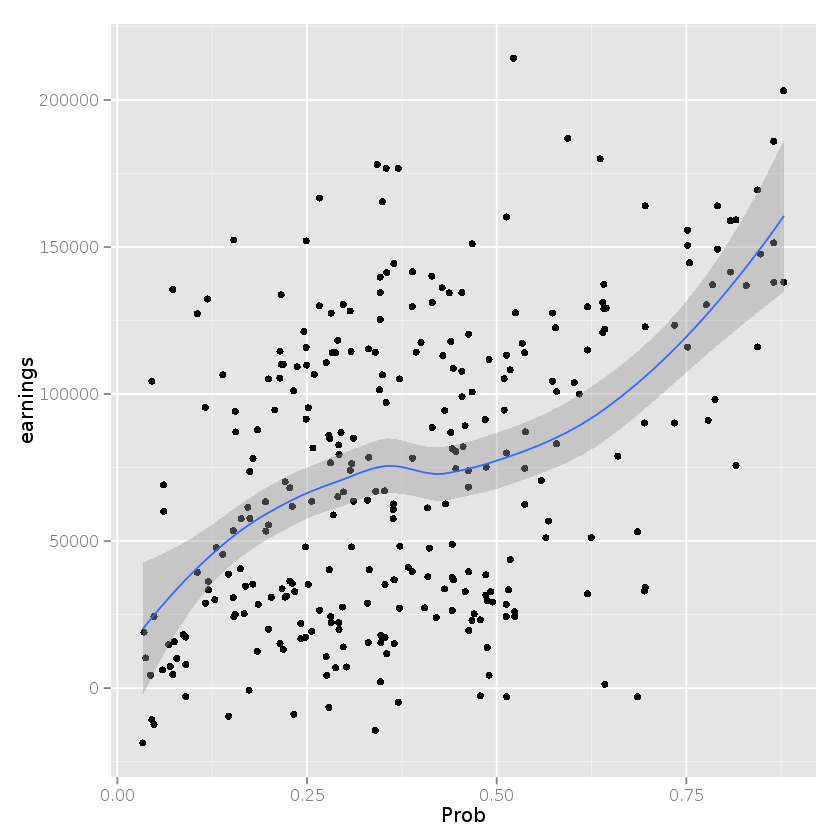

In [96]:
library("ggplot2")
ggplot(data = earnings_probs, aes(x = Prob, y = earnings)) +
geom_point() +
geom_smooth()